In [10]:
import os, sys

import xarray as xr

# My imports
sys.path.append(os.path.join(os.getcwd(), 'Documents', 'time_of_emergene_drafts'))
sys.path.append(os.path.join(os.getcwd(), 'Documents', 'time_of_emergene_drafts', 'src'))

import open_data

In [3]:
ds = xr.open_dataset('/g/data/w40/ab2313/time_of_emergence/toe_metrics/best_tas_(1880_1910)/data_availability_mask.zarr')

Matplotlib created a temporary cache directory at /jobfs/136846996.gadi-pbs/matplotlib-jnei4wh9 because the default path (/home/563/ab2313/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


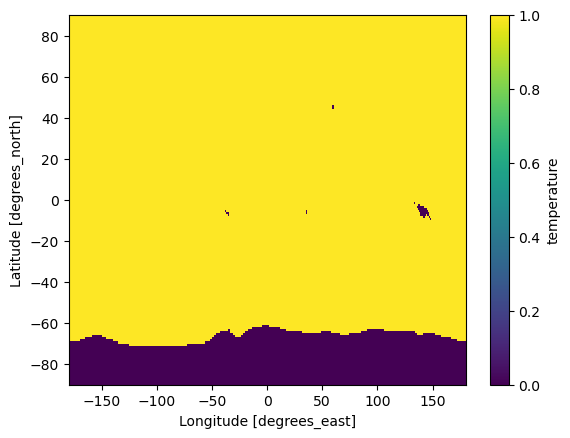

In [6]:
ds.temperature.plot()

In [12]:
data_ds = open_data.open_best().persist()


Opening best dataset from - /g/data/w40/ab2313/time_of_emergence/best/Land_and_Ocean_LatLong1_time_chunk.zarr


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


  -- overriding time to use cftime
  -- resampling to yearly mean


INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:_choose_method: method is None
INFO:flox:_choose_method: choosing preferred_method=blockwise
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: reindex is False


In [24]:
data_ds.isel(time=slice(30, 60))

<xarray.DataArray 'temperature' (time: 30, lat: 180, lon: 360)> Size: 8MB
dask.array<getitem, shape=(30, 180, 360), dtype=float32, chunksize=(30, 90, 120), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 1kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * time     (time) object 240B 1880-12-31 00:00:00 ... 1909-12-31 00:00:00
Attributes:
    long_name:      Air Surface Temperature Anomaly
    standard_name:  surface_temperature_anomaly
    units:          degree C
    valid_max:      25.701491748794503
    valid_min:      -20.130122807817852
    dataset_name:   best

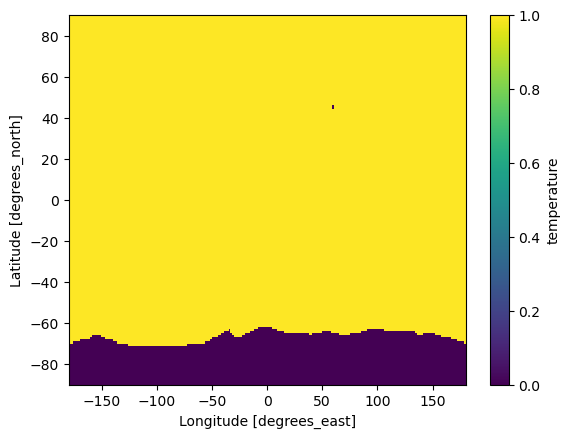

In [22]:
((data_ds.isel(time=slice(30, 60)).count(dim='time')/30)>0.6).plot()